In [30]:
!pip install imblearn -q
!pip install keras -q
!pip install tensorflow -q

# Get the data
Same as in EDA notbook

In [31]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import re
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [32]:
df = pd.read_csv("../data/data_clean_new.csv", 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)
df = df.drop("Unnamed: 0", axis = 1)

In [33]:
df.stars.value_counts()

3.5    12833
4.0    12816
3.0     9421
4.5     5881
2.5     5080
2.0     2771
1.5      936
5.0      931
1.0      217
Name: stars, dtype: int64

In [34]:
for column in df.columns :
    if df[column][0] == 'True' or df[column][0] =='False':
    #This tests if the column is a boolean by using the first row for efficiency    
        df[column] = df[column]=='True'
        
    #for some columns we have NaN, in that case we test if we find a True or False value
    elif "True" in df[column].values :
        df[column] = df[column]=='True'
    elif "False" in df[column].values :
        df[column] = df[column]=='True'

In [35]:
cuisine_type = ["American (New)","American (Traditional)","Arts & Entertainment","Asian Fusion","Bakeries","Barbeque","Bars",
"Beer","Breakfast & Brunch","Buffets","Burgers","Cafes","Canadian (New)","Caribbean","Caterers","Chicken Wings",
"Chinese","Cocktail Bars","Coffee & Tea","Comfort Food","Delis","Desserts","Diners","Ethnic Food",
"Event Planning & Services","Fast Food","Food","Food Delivery Services","French","Gastropubs","Gluten-Free",
"Greek","Grocery","Halal","Hot Dogs","Ice Cream & Frozen Yogurt","Indian","Italian","Japanese","Juice Bars & Smoothies",
"Korean","Latin American","Lounges","Mediterranean","Mexican","Middle Eastern","Nightlife","Pizza","Pubs",
"Salad","Sandwiches","Seafood","Soup","Specialty Food","Sports Bars","Steakhouses","Sushi Bars","Tex-Mex",
"Thai","Vegan","Vegetarian","Vietnamese","Wine & Spirits","Wine Bars"]

ambiance = ["romantic","intimate","classy","hipster","divey","touristy","trendy","upscale","casual"]

In [36]:
for column in df[cuisine_type] :
    df[column] = df[column]=="1"

In [37]:
df['stars']=df['stars'].astype(float)
df.Price = pd.to_numeric(df.Price, errors='coerce')
df = df[np.isfinite(df['Price'])]

In [38]:
df.columns

Index(['address', 'business_id', 'city', 'is_open', 'latitude', 'longitude',
       'name', 'postal_code', 'review_count', 'stars', 'state', 'Price',
       'American (New)', 'American (Traditional)', 'Arts & Entertainment',
       'Asian Fusion', 'Bakeries', 'Barbeque', 'Bars', 'Beer',
       'Breakfast & Brunch', 'Buffets', 'Burgers', 'Cafes', 'Canadian (New)',
       'Caribbean', 'Caterers', 'Chicken Wings', 'Chinese', 'Cocktail Bars',
       'Coffee & Tea', 'Comfort Food', 'Delis', 'Desserts', 'Diners',
       'Ethnic Food', 'Event Planning & Services', 'Fast Food', 'Food',
       'Food Delivery Services', 'French', 'Gastropubs', 'Gluten-Free',
       'Greek', 'Grocery', 'Halal', 'Hot Dogs', 'Ice Cream & Frozen Yogurt',
       'Indian', 'Italian', 'Japanese', 'Juice Bars & Smoothies', 'Korean',
       'Latin American', 'Lounges', 'Mediterranean', 'Mexican',
       'Middle Eastern', 'Nightlife', 'Pizza', 'Pubs', 'Salad', 'Sandwiches',
       'Seafood', 'Soup', 'Specialty Food', 'Spo

In [39]:
df["review_count"]= df["review_count"].astype(int)
df["name_length"]= df["name_length"].astype(int)

# Base rate
The base rate is the size of the most common class divided by the size of the dataset.
Our accuracy should be better than the default rate

In [40]:
print("The most common class for the ratings is ", df["stars"].mode())

baseRate = df[df["stars"] == 3.5].count()["stars"] / df["stars"].count()
baseRate

The most common class for the ratings is  0    3.5
dtype: float64


0.25228663034284704

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [42]:
#mean normalisation
#df["normalized_review_count"]=(df["review_count"]-df["review_count"].mean())/df["review_count"].std()

#min-max normalisation 
#df["normalized_review_count"]=(df["review_count"]-df["review_count"].min())/(df["review_count"].max()-df["review_count"].min())

In [43]:
#df["filter_stars"] = df[df["stars"] != 1]["stars"]
#df["filter_stars"] = df["filter_stars"].dropna()

In [44]:
X = df.drop(['stars', "name", "address", "business_id", "city", "state", 'postal_code'], axis = 1)
y = df["stars"]

In [45]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded_y = lab_enc.fit_transform(y) #we label encode the star ratings

In [46]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, encoded_y) # upsampling

In [16]:
X_resampled[0]

array([  1.        ,  43.60549897, -79.65228891, 128.        ,
         2.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [44]:
#balance classes

#balanced = pd.DataFrame(columns=df.columns) #create empty df
#for i in df["filter_stars"].dropna().unique():
  #  balanced = balanced.append(df[df["filter_stars"] == i].sample(900))


In [17]:
#balanced["stars"].value_counts()

In [18]:

#X = df[["name_length", "normalized_review_count", "Price", "American (New)", "Sandwiches"]]
#X = balanced.drop(["stars","filter_stars", "name", "address", "business_id", "city", "state", "review_count", 'postal_code'], axis = 1)
#y = balanced["stars"]


In [47]:
# split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=72)

In [18]:
LR = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class = "auto")
LR.fit(X_train, y_train)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# train accuracy
#lbfgs: 0.29628
#newton-cg: 0.2962
LR.score(X_train,y_train)

0.32332398453658484

In [20]:
# test accuracy
#lbfgs: 0.29015
#newton-cg: 29015
LR.score(X_test, y_test)

0.3192705851778057

Our test accuracy is above the baserate but it isn't really a good result

In [21]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

clf = RandomForestClassifier(n_estimators = 200,max_depth = 10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
print("Train accuracy :", clf.score(X_train,y_train))
print("Test accuracy :", clf.score(X_test, y_test))

Train accuracy : 0.48010222313664763
Test accuracy : 0.43829860960713823


In [ ]:
from sklearn.svm import SVC

clf2 = SVC(kernel="rbf", class_weight="balanced", probability=True)
clf2.fit(X_train, y_train)

In [ ]:
print("Train accuracy :", clf2.score(X_train,y_train))
print("Test accuracy :", clf2.score(X_test, y_test))

C:\Users\David\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03024863 0.11456888 0.11660767 0.12505672 0.04159486 0.01329131
 0.01710451 0.00368762 0.00663369 0.00537474 0.00703972 0.00717843
 0.0019844  0.01393281 0.00556209 0.02080133 0.01053994 0.00638439
 0.00304345 0.00477697 0.0128018  0.01216454 0.00159957 0.01217515
 0.00408427 0.00804727 0.00535413 0.00542186 0.00216024 0.00644614
 0.04030274 0.02435949 0.00323012 0.00375666 0.00189947 0.00364311
 0.00528754 0.00285714 0.00278558 0.00659775 0.00468837 0.00584889
 0.01331142 0.00672665 0.00350007 0.00352022 0.00316907 0.00204001
 0.00664535 0.01286806 0.00527915 0.00994508 0.01760313 0.00288863
 0.00894489 0.01852991 0.00882862 0.0034619  0.0080731  0.00371438
 0.00504811 0.00629698 0.00404978 0.00540885 0.00344391 0.00373199
 0.00442012 0.00205673 0.00219268 0.00319454 0.0901827 ]


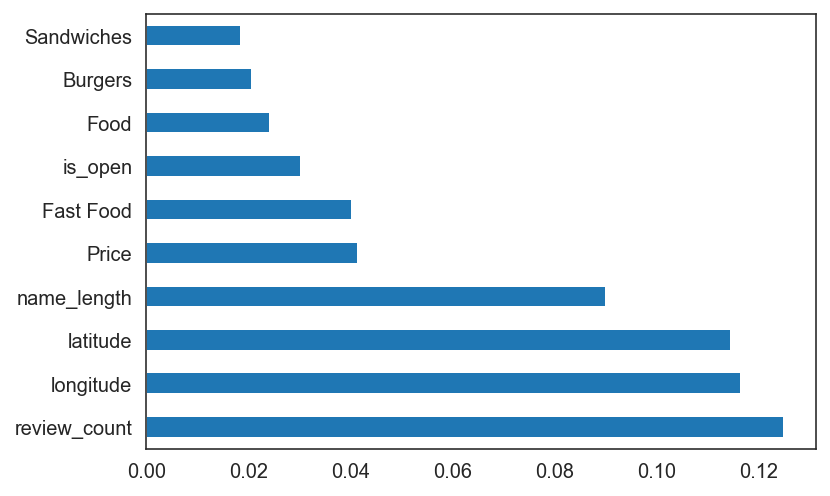

In [81]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Neural network

In [66]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers
from keras.utils import np_utils
np.random.seed(1143)

In [67]:
model = Sequential()
model.add(Dense(512, input_shape=(64,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [68]:
optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [69]:
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               33280     
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 38,410
Trainable params: 38,410
Non-trainable params: 0
_________________________________________________________________


In [80]:
nb_classes = len(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

#y_train = np_utils.to_categorical(y_train, nb_classes) 
#y_test = np_utils.to_categorical(y_test, nb_classes)

In [82]:
model_hist = model.fit(X_train, y_train,
                       batch_size=64, epochs=20,
                       verbose=3, validation_split=0.2)

ValueError: Error when checking input: expected dense_3_input to have shape (64,) but got array with shape (71,)

In [82]:
df = df[np.isfinite(df['Price'])]

In [28]:
np.any(np.isnan(df["Price"]))

False

In [85]:
np.all(np.isfinite(df["Price"]))

False

In [98]:
X = df[["name_length","Price"]]
y = df["stars"]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y) #we label encode the star ratings

# split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.2, random_state=72)

In [100]:
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500, multi_class = "auto")
LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [101]:
print("Train accuracy :",LR.score(X_train,y_train))
print("Test accuracy :",LR.score(X_test, y_test))

Train accuracy : 0.25722458559483646
Test accuracy : 0.263348327791903
